In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys; sys.path.append('..')
import fastai_scans
from fastai.basics import *

path = Path('../../../datasets/brats2018/')

In [3]:
bs = 4
vol_size = (128,128,128)

In [4]:
data = (fastai_scans.SegmentationItemList.from_paths(path/'train_data_preprocessed', path/'train_lbls_preprocessed')
                                         .random_split_by_pct(0.2, seed=7)
                                         .label_from_bcolz()
                                         .transform(fastai_scans.get_transforms(), tfm_y=True)
                                         .databunch(bs=bs)
                                         .normalize())

In [4]:
data

BcolzDataBunch;

Train: LabelList
y: SegmentationLabelList (228 items)
[VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128)]...
Path: .
x: SegmentationItemList (228 items)
[Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128)]...
Path: .;

Valid: LabelList
y: SegmentationLabelList (57 items)
[VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128), VolumeSegment (128, 128, 128)]...
Path: .
x: SegmentationItemList (57 items)
[Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128), Volume (4, 128, 128, 128)]...
Path: .;

Test: None

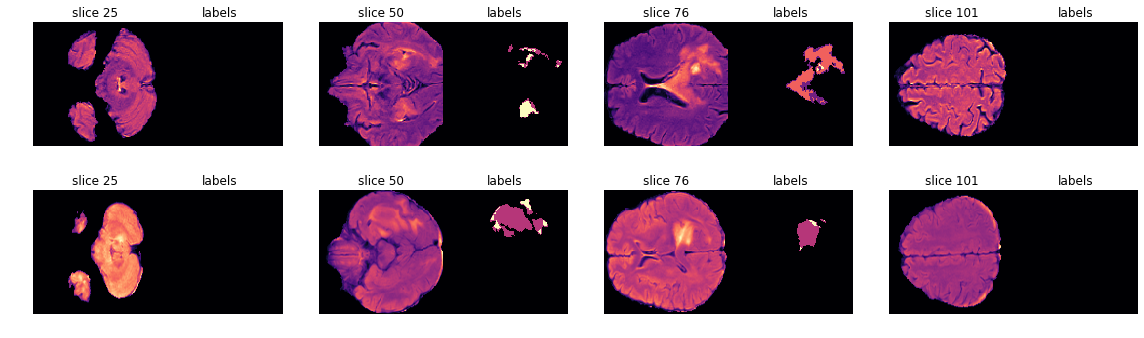

In [5]:
data.show_batch(2)

In [5]:
encoder = fastai_scans.models.Simple3d(vol_size, ni=4, nf=8, num_layers=4)
encoder = nn.Sequential(*list(encoder.children())[:-3])
m = fastai_scans.models.DynamicVnet(vol_size, encoder, n_classes=4)
learn = Learner(data, m, metrics=fastai_scans.models.get_segmentation_metrics(), path='experiments/vnet')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


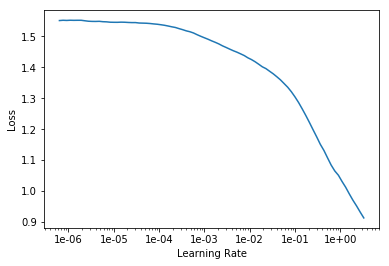

In [6]:
learn.lr_find()
learn.recorder.plot()

In [8]:
learn.fit_one_cycle(10, 3e-2)

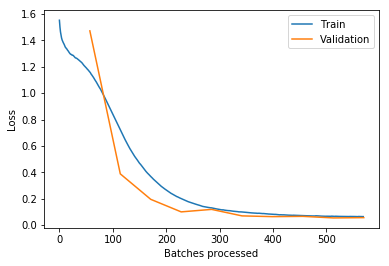

In [9]:
learn.recorder.plot_losses()

In [10]:
# learn.save('model')
# learn.load('model');

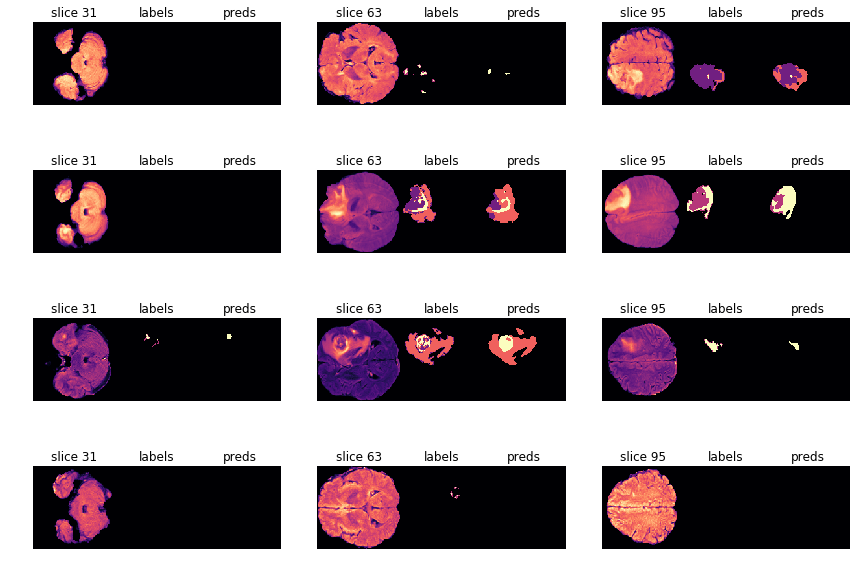

In [11]:
learn.show_results(rows=4)